## Redukcja wymiarowości - intuicja

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.colors
import random
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import discriminant_analysis
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.manifold import Isomap

In [2]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


,wzrost (inch),waga (lbs)
0,67.75,154.25
1,72.25,173.25
2,66.25,154.00
3,72.25,184.75
4,71.25,184.25
...,...,...
247,67.00,134.25
248,69.75,201.00
249,66.00,186.75
250,70.50,190.75


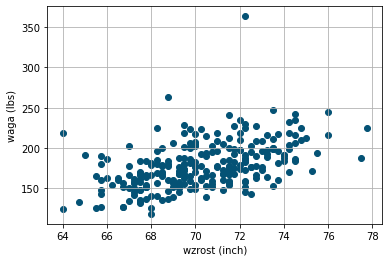

In [3]:
#Zbiór danych Fitting Percentage of Body Fat to Simple Body Measurements dostępny w archiwum danych JSE Journal of Statistics Education
url = 'https://jse.amstat.org/datasets/fat.dat.txt'
data = (pd.read_fwf(url, colspecs = [(35, 37), (39, 45), (48, 53)], header=None,
                names = ["age", "weight", "height"])
        .query('height >= 40'))

#Przykładowa tabela danych o dwóch wymiarach
df1 = data[['height', 'weight']]
df1.columns = ['wzrost (inch)', 'waga (lbs)']
plt.grid()
plt.scatter(data=df1, x='wzrost (inch)', y='waga (lbs)', color='#045275')
plt.rcParams['axes.axisbelow'] = True
plt.xlabel('wzrost (inch)')
plt.ylabel('waga (lbs)')
df1

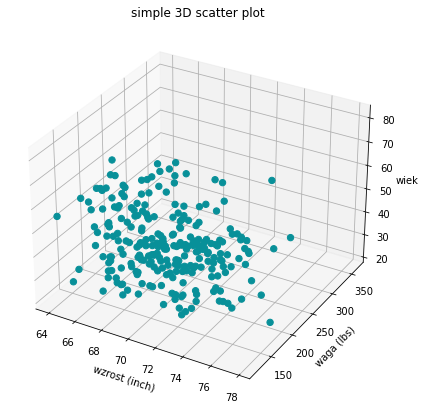

,wzrost (inch),waga (lbs),wiek
0,67.75,154.25,23
1,72.25,173.25,22
2,66.25,154.00,22
3,72.25,184.75,26
4,71.25,184.25,24
...,...,...,...
247,67.00,134.25,70
248,69.75,201.00,72
249,66.00,186.75,72
250,70.50,190.75,72


In [4]:
#Przykładowa tabela danych o trzech wymiarach
df2 = data[['height', 'weight', 'age']]
df2.columns = ['wzrost (inch)', 'waga (lbs)', 'wiek']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(df2['wzrost (inch)'], df2['waga (lbs)'], df2['wiek'], s=40, marker='o', alpha=1, color='#089099')
plt.title("simple 3D scatter plot")
ax.set_xlabel('wzrost (inch)')
ax.set_ylabel('waga (lbs)')
ax.set_zlabel('wiek')
plt.show()
df2

,wzrost(inch),wzrost(cm)
0,67.75,172.085
1,72.25,183.515
2,66.25,168.275
3,72.25,183.515
4,71.25,180.975
...,...,...
247,67.00,170.180
248,69.75,177.165
249,66.00,167.640
250,70.50,179.070


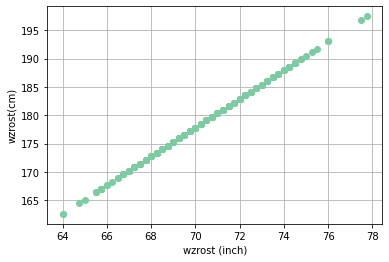

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

#Przykładowa tabela o dwóch liniowo zależnych kolumnach
df3 = data[['height']]
df3['wzrost(cm)']=df3.height*2.54
df3.columns = ['wzrost(inch)', 'wzrost(cm)']
df3
plt.scatter(data=df3, x='wzrost(inch)', y='wzrost(cm)', color='#7CCBA2')
plt.grid()
plt.xlabel('wzrost (inch)')
plt.ylabel('wzrost(cm)')
df3

## Redukcja wymiarowości - przedstawienie wybranych metod

### Zbiór danych Digits (scikit-learn)

In [6]:
digits = load_digits()
print(digits.keys())

#Wielkość zbioru
print(digits.data.shape)

#Wektor cech opisujący pierwszy obrazek w zbiorze (o wielkości 8x8 pikseli)
print(digits['images'][0])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


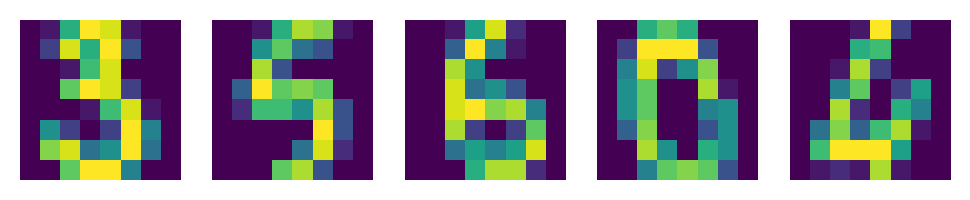

In [7]:
#Wizualizacja losowych cyfr ze zbioru danych
random.seed(1122)
fig, ax_array = plt.subplots(1, 5)
fig.set_dpi(200)
axes = ax_array.flatten()
rand = random.sample(range(len(digits['images'])),5)
for i,ax in enumerate(axes):
    ax.imshow(digits.images[rand[i]])
plt.setp(axes, xticks=[], yticks=[], frame_on=False);

### PCA

In [8]:
#Model PCA redukujący dane do 2 wymiarów (2 principal components)
pca = PCA(2)
pca_embedding = pca.fit_transform(digits.data)
print(pca_embedding.shape)

#Explained variance ratio - % wariancji oryginalnego zbioru wyjaśniany przez każdy wymiar po redukcji
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
print(cum_sum_eigenvalues)

(1797, 2)
[0.14890594 0.28509365]


In [9]:
pca_embedding
#Prawdziwe etykiety cyfr
print(digits.target)

[0 1 2 ... 8 9 8]


In [10]:
#Mapa kolorów do wizualizacji
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#003147','#045275','#089099','#7CCBA2','#FCDE9C','#EEB479','#F0746E','#DC3977','#7C1D6F'])

#Funkcja do wizualizacji rezultatów redukcji wymiarów
def plot_reduced_data(embedding, color_col, cmap):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

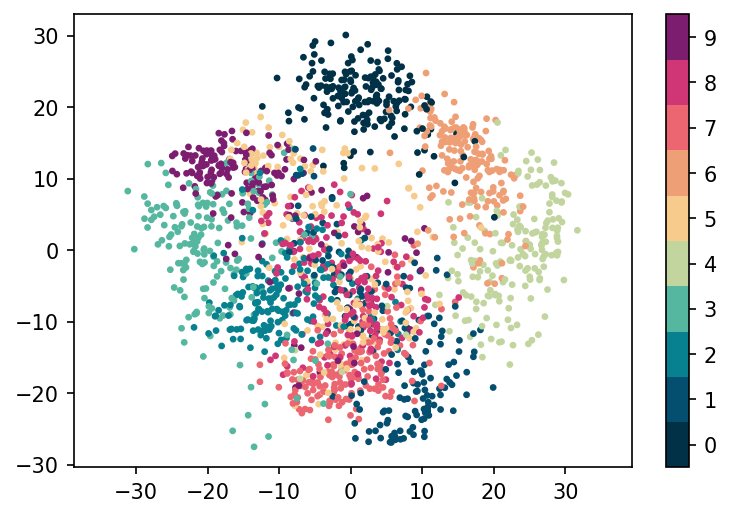

In [11]:
#Wyniki redukcji metodą PCA
plot_reduced_data(pca_embedding, digits.target, cmap1)

### UMAP

In [12]:
model = umap.UMAP(random_state=42)
model.fit(digits.data)
umap_embedding = model.transform(digits.data)
umap_embedding.shape

(1797, 2)

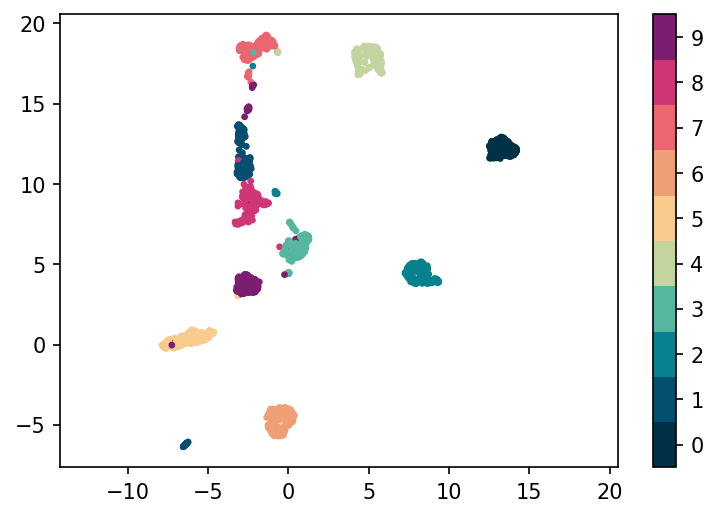

In [13]:
plot_reduced_data(umap_embedding, digits.target, cmap1)

### t-SNE

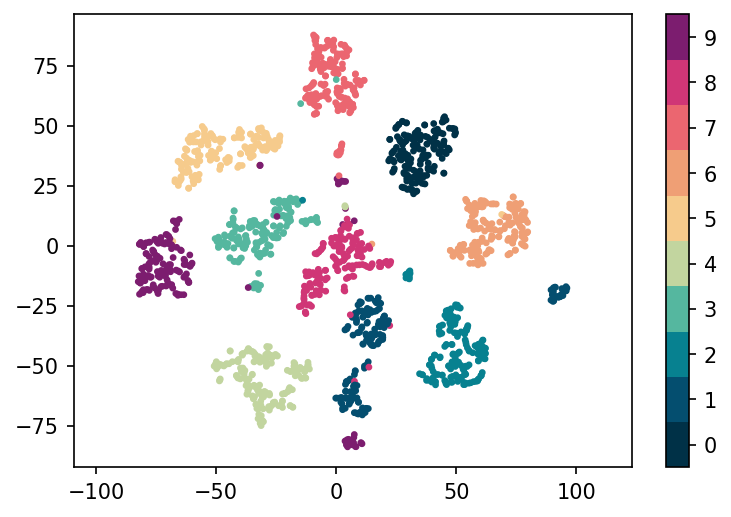

In [14]:
tsne_embedding=TSNE(perplexity=10, metric='euclidean',init='random', learning_rate=200, random_state=42, n_jobs=-1).fit_transform(digits.data)
plot_reduced_data(tsne_embedding, digits.target, cmap1)

### Isomap

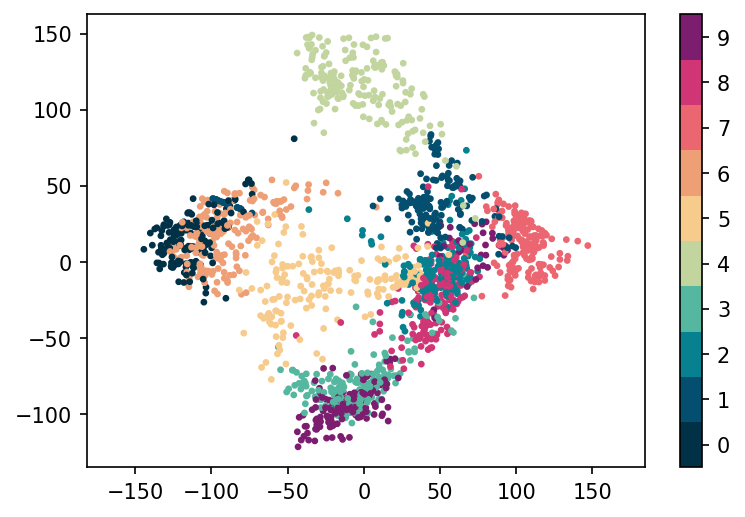

In [15]:
Isomap_embedding = Isomap(n_components=2,n_neighbors=7,n_jobs=-1,).fit_transform(digits.data)
plot_reduced_data(Isomap_embedding, digits.target, cmap1)

## Grupowanie - przedstawienie wybranych metod

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import seaborn as sn
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram, set_link_color_palette
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    rand_score, 
    adjusted_rand_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score)

### Zbiór danych Wine

In [17]:
wine = load_wine()
data = pd.DataFrame(np.c_[wine.target, wine.data],
                     columns= ['target'] + wine.feature_names)

In [18]:
data.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
#Wartości brakujące
data.isnull().sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [20]:
#Liczebności klas
data.target.value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [21]:
#Dane po usunięciu etykiet
wine = pd.DataFrame(wine.data, columns=wine.feature_names)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [22]:
#Zmiana formatu wyświetlania i uproszczenie nazw zmiennych
wine.columns=["V"+str(i) for i in range(1, 14)]
pd.options.display.float_format = "{:,.2f}".format
wine.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,"1,680.00"


<AxesSubplot:title={'center':'Macierz korelacji - Zbiór Wine'}>

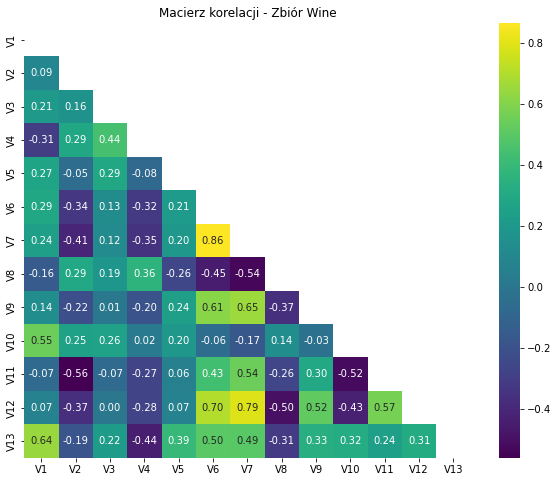

In [23]:
#Wykres korelacji pomiędzy zmiennymi
plt.figure(figsize=(10,8))
plt.title("Macierz korelacji - Zbiór Wine")
mask = np.triu(np.ones_like(wine.corr(), dtype=bool))
sn.heatmap(wine.corr(),mask=mask, annot=True, cmap="viridis", fmt='0.2f')

In [24]:
#Wartości odstające na podstawie rozstępu międzykwartylowego
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for i in list(wine.columns):
    outliers = find_outliers_IQR(wine[i])
    print("liczba wartości odstających dla zmiennej " + i + " : " + str(len(outliers)))

liczba wartości odstających dla zmiennej V1 : 0
liczba wartości odstających dla zmiennej V2 : 3
liczba wartości odstających dla zmiennej V3 : 3
liczba wartości odstających dla zmiennej V4 : 4
liczba wartości odstających dla zmiennej V5 : 4
liczba wartości odstających dla zmiennej V6 : 0
liczba wartości odstających dla zmiennej V7 : 0
liczba wartości odstających dla zmiennej V8 : 0
liczba wartości odstających dla zmiennej V9 : 2
liczba wartości odstających dla zmiennej V10 : 4
liczba wartości odstających dla zmiennej V11 : 1
liczba wartości odstających dla zmiennej V12 : 0
liczba wartości odstających dla zmiennej V13 : 0


Text(0.5, 1.0, 'V11')

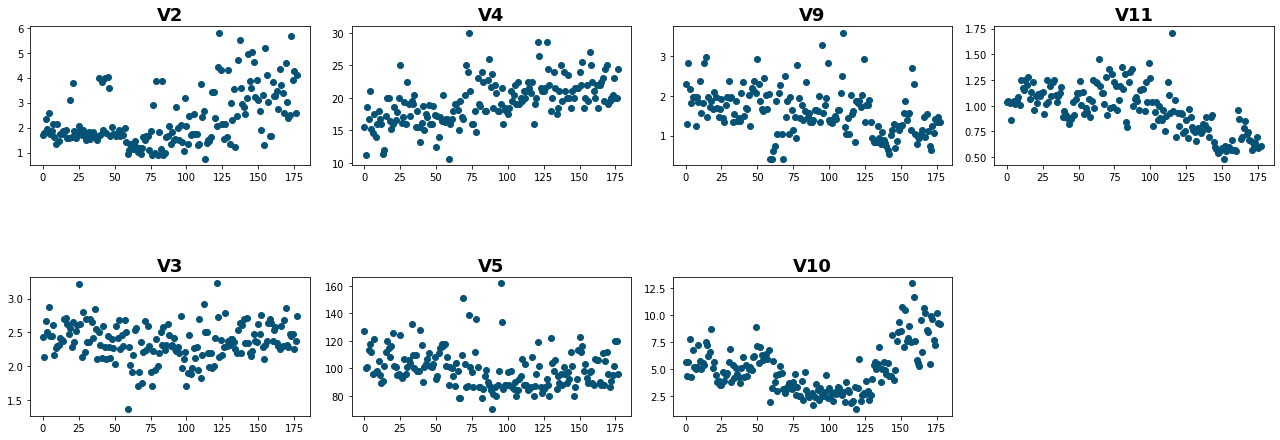

In [25]:
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(nrows=5, ncols=4)

ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[3:, 0])
ax12 = fig.add_subplot(gs[:2, 1])
ax22 = fig.add_subplot(gs[3:, 1])
ax13 = fig.add_subplot(gs[:2, 2])
ax23 = fig.add_subplot(gs[3:, 2])
ax14 = fig.add_subplot(gs[:2, 3])
fig.tight_layout()

ax11.scatter(wine.index, wine['V2'], color='#045275')
ax11.set_title("V2", fontweight="bold", fontsize = 18)
ax21.scatter(wine.index, wine['V3'], color='#045275')
ax21.set_title("V3", fontweight="bold", fontsize = 18)
ax12.scatter(wine.index, wine['V4'], color='#045275')
ax12.set_title("V4", fontweight="bold", fontsize = 18)
ax22.scatter(wine.index, wine['V5'], color='#045275')
ax22.set_title("V5", fontweight="bold", fontsize = 18)
ax13.scatter(wine.index, wine['V9'], color='#045275')
ax13.set_title("V9", fontweight="bold", fontsize = 18)
ax23.scatter(wine.index, wine['V10'], color='#045275')
ax23.set_title("V10", fontweight="bold", fontsize = 18)
ax14.scatter(wine.index, wine['V11'], color='#045275')
ax14.set_title("V11", fontweight="bold", fontsize = 18)

In [26]:
#Standaryzacja zmiennych
wine = pd.DataFrame(StandardScaler().fit(wine).transform(wine))
wine.columns=["V"+str(i) for i in range(1, 14)]
wine.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1.52,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.85,1.01
1,0.25,-0.50,-0.83,-2.49,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.41,1.11,0.97
2,0.20,0.02,1.11,-0.27,0.09,0.81,1.22,-0.50,2.14,0.27,0.32,0.79,1.40
3,1.69,-0.35,0.49,-0.81,0.93,2.49,1.47,-0.98,1.03,1.19,-0.43,1.18,2.33
4,0.30,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04


### K-średnich

In [27]:
x = range(2,11)
inertias = [] # inertia of clusters
sil_scores = [] # silhouette scores
adj_rand_scores = []

for i in x:
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=100).fit(wine)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(wine, kmeans.labels_))   #metric="euclidian"
    
print(sil_scores)
print(inertias)
print(adj_rand_scores)

[0.2593169555318255, 0.2848589191898987, 0.24155514990893945, 0.22598380172332858, 0.2446101214077127, 0.19828737481472294, 0.1458352034503576, 0.1344858240026975, 0.14492428561568166]
[1658.7588524290954, 1277.928488844642, 1181.6862898812215, 1102.48852805811, 1043.7818998800074, 983.5990241848214, 946.4909335010204, 902.7038141603423, 852.0755922675712]
[]


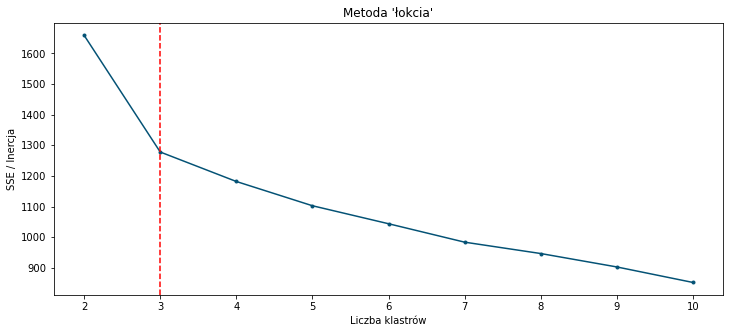

In [28]:
#Metoda „łokcia” do wyznaczenia optymalnej liczby klastów (wykres inercji ~ l.klastrów)
plt.figure(figsize = (12,5))
plt.plot(x, inertias,'.-', color='#045275')
plt.ylabel('SSE / Inercja')
plt.xlabel('Liczba klastrów')
plt.title("Metoda 'łokcia'")
plt.axvline(3, ls="--", color='red');

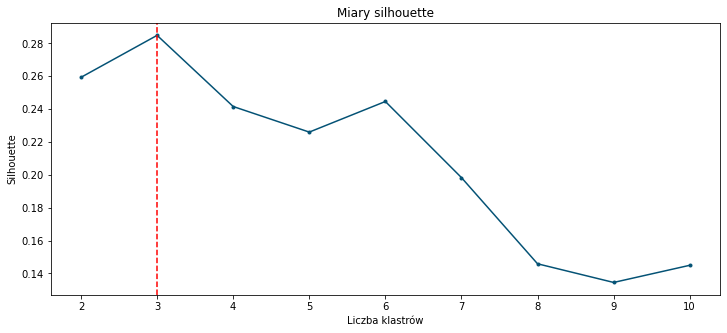

In [29]:
#Metoda do wyznaczenia optymalnej liczby klastów (wykres miary silhouette ~ l.klastrów)
plt.figure(figsize = (12,5))
plt.plot(x, sil_scores,'.-', color='#045275')
plt.ylabel('Silhouette')
plt.xlabel('Liczba klastrów')
plt.title("Miary silhouette")
plt.axvline(3, ls="--", color='red');

In [30]:
#Prognozowane etykiety z grupowania na 3 skupienia
kmeans_3c = KMeans(n_clusters=3, random_state=0).fit(wine)
print("Etykiety nadane obserwacjom za pomocą algorytmu k-średnich:")
print(kmeans_3c.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu k-średnich:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#Liczebności prognozowanych etykiet
kmeans_3c_sum = pd.DataFrame()
kmeans_3c_sum.loc[:,'Klaster'] = kmeans_3c.labels_
kmeans_3c_sum = kmeans_3c_sum.groupby('Klaster').size().to_frame()
kmeans_3c_sum.columns = ["Liczba obserwacji"]
kmeans_3c_sum

,Liczba obserwacji
Klaster,
0,51
1,66
2,61


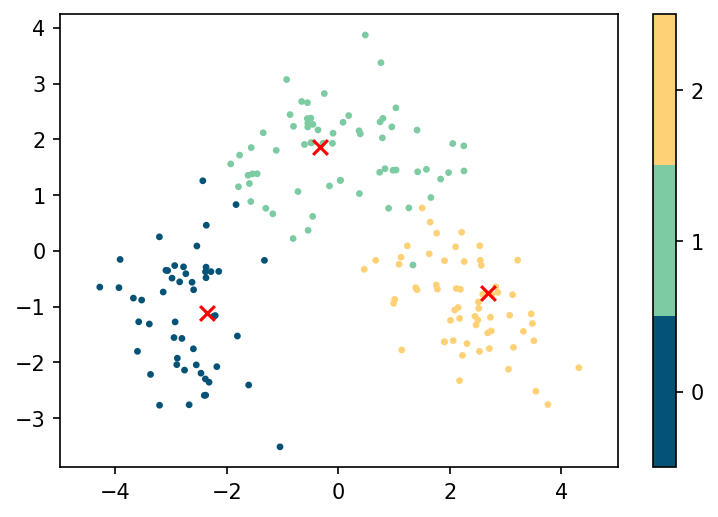

In [32]:
#Mapa kolorów do wizualizacji wyników grupowania
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#7CCBA2','#FED176'])

#Wizualizacja wyników grupowania z wykorzystaniem redukcji wymiarowości metodą PCA 
pca = PCA(2)
pca_embedding_km3c = pca.fit_transform(wine)
plot_reduced_data(pca_embedding_km3c, kmeans_3c.labels_, cmap2)
centers=pca.fit_transform(kmeans_3c.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='x',s=50,c='red')

#### Miary wewnętrzne

In [33]:
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []
mutual_info_scores = []
normalized_mutual_info_scores = []
adjusted_mutual_info_scores = []
v_measure_scores = []

In [34]:
ss_km = silhouette_score(wine, kmeans_3c.labels_)
silhouette_scores.append(ss_km) 
silhouette_scores

[0.28594199657074876]

In [35]:
chs_km = calinski_harabasz_score(wine, kmeans_3c.labels_)
calinski_harabasz_scores.append(chs_km) 
calinski_harabasz_scores

[70.83688657175372]

In [36]:
dbs_km = davies_bouldin_score(wine, kmeans_3c.labels_)
davies_bouldin_scores.append(dbs_km) 
davies_bouldin_scores

[1.3917938323177375]

#### Miary zewnętrzne

In [37]:
ars_km = adjusted_rand_score(data.target, kmeans_3c.labels_)
adjusted_rand_scores.append(ars_km) 
adjusted_rand_scores

[0.9148795960669529]

In [38]:
MI_km = mutual_info_score(data.target, kmeans_3c.labels_)
NMI_km = normalized_mutual_info_score(data.target, kmeans_3c.labels_)
AMI_km = adjusted_mutual_info_score(data.target, kmeans_3c.labels_)
print(MI_km)
print(NMI_km)
print(AMI_km)
mutual_info_scores.append(MI_km) 
mutual_info_scores
normalized_mutual_info_scores.append(NMI_km) 
normalized_mutual_info_scores
adjusted_mutual_info_scores.append(AMI_km) 
adjusted_mutual_info_scores

0.9724883085711757
0.8925851652969188
0.8914476096236207


[0.8914476096236207]

In [39]:
HS_km = homogeneity_score(data.target, kmeans_3c.labels_)
CS_km = completeness_score(data.target, kmeans_3c.labels_)
V_km = v_measure_score(data.target, kmeans_3c.labels_, beta=1.0)
print(V_km)
v_measure_scores.append(V_km) 
v_measure_scores

0.8925851652969188


[0.8925851652969188]

### Grupowanie hierarchiczne

In [40]:
x = range(2,11)
sil_scores = [] # silhouette scores

for i in x:
    ag = AgglomerativeClustering(n_clusters = i).fit(wine)
    sil_scores.append(silhouette_score(wine, ag.labels_))

print(sil_scores)
max(sil_scores)

[0.2670131771272231, 0.2774439826952266, 0.22583665933475802, 0.18674235566758707, 0.17966642854438503, 0.1868534256022694, 0.18834697102837822, 0.1917169293227209, 0.19856750165505588]


0.2774439826952266

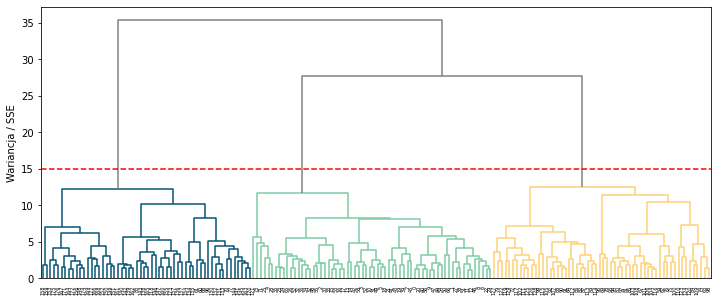

In [41]:
#Dendogram
links = linkage(wine, method='ward')
set_link_color_palette(['#045275','#7CCBA2','#FED176'])
plt.figure(figsize = (12,5))
dendrogram(links, leaf_rotation = 90, above_threshold_color="grey")
plt.ylabel('Wariancja / SSE')
plt.axhline(15, ls="--", color='red');
plt.show()

In [42]:
ag = AgglomerativeClustering(n_clusters = 3).fit(wine)
print("Etykiety nadane obserwacjom za pomocą algorytmu aglomeracyjnego:")
print(ag.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu aglomeracyjnego:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [43]:
#Liczebność prognozowanych klas
ag_labels_sum = pd.DataFrame()
ag_labels_sum.loc[:,'Klaster'] = ag.labels_
ag_labels_sum = ag_labels_sum.groupby('Klaster').size().to_frame()
ag_labels_sum.columns = ["Liczba obserwacji"]
ag_labels_sum

,Liczba obserwacji
Klaster,
0,58
1,56
2,64


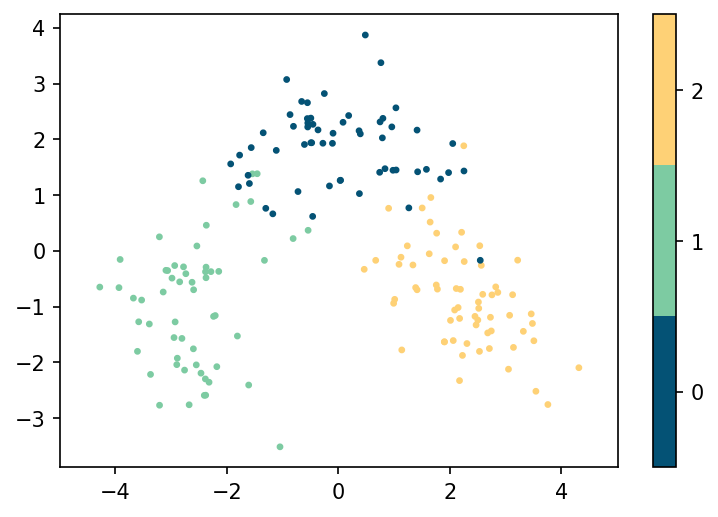

In [44]:
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#7CCBA2','#FED176'])

#Wizualizacja wyników grupowania z wykorzystaniem redukcji wymiarowości metodą PCA 
pca = PCA(2)
pca_embedding_ag = pca.fit_transform(wine)
plot_reduced_data(pca_embedding_ag, ag.labels_, cmap2)

#### Miary wewnętrzne

In [45]:
ss_ag = silhouette_score(wine, ag.labels_)
silhouette_scores.append(ss_ag) 
silhouette_scores

[0.28594199657074876, 0.2774439826952266]

In [46]:
chs_ag = calinski_harabasz_score(wine, ag.labels_)
calinski_harabasz_scores.append(chs_ag) 
calinski_harabasz_scores

[70.83688657175372, 67.6474675044098]

In [47]:
dbs_ag = davies_bouldin_score(wine, ag.labels_)
davies_bouldin_scores.append(dbs_ag) 
davies_bouldin_scores

[1.3917938323177375, 1.4185919431857326]

#### Miary zewnętrzne

In [48]:
ars_ag = adjusted_rand_score(data.target, ag.labels_)
adjusted_rand_scores.append(ars_ag) 
adjusted_rand_scores

[0.9148795960669529, 0.7899332213582837]

In [49]:
MI_ag = mutual_info_score(data.target, ag.labels_)
NMI_ag = normalized_mutual_info_score(data.target, ag.labels_)
AMI_ag = adjusted_mutual_info_score(data.target, ag.labels_)
print(MI_ag)
print(NMI_ag)
print(AMI_ag)
mutual_info_scores.append(MI_ag) 
mutual_info_scores
normalized_mutual_info_scores.append(NMI_ag) 
normalized_mutual_info_scores
adjusted_mutual_info_scores.append(AMI_ag) 
adjusted_mutual_info_scores

0.8584365761880877
0.7864652657004839
0.7842084168747391


[0.8914476096236207, 0.7842084168747391]

In [50]:
HS_ag = homogeneity_score(data.target, ag.labels_)
CS_ag = completeness_score(data.target, ag.labels_)
V_ag = v_measure_score(data.target, ag.labels_, beta=1.0)
print(V_ag)
v_measure_scores.append(V_ag) 
v_measure_scores

0.7864652657004839


[0.8925851652969188, 0.7864652657004839]

### DBSCAN

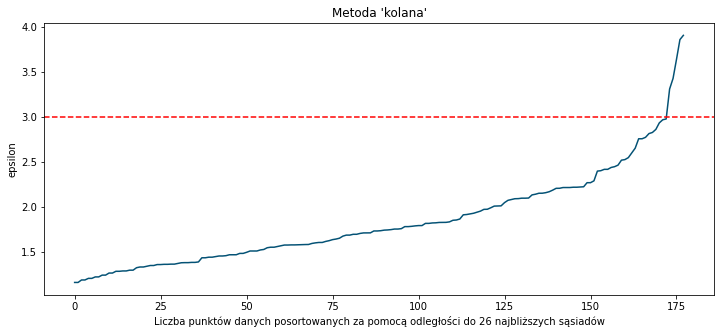

In [51]:
neighbors_fit = NearestNeighbors(n_neighbors=26).fit(wine)
distances, indices = neighbors_fit.kneighbors(wine)
distances = np.sort(distances[:,1], axis=0)

#Metoda “kolana” do wyboru optymalnej liczby klastrów (wykres eps ~ l.posortowanych pkt.)
plt.figure(figsize = (12,5))
plt.plot(distances, color='#045275')
plt.axhline(3, ls="--", color='red')
plt.ylabel('epsilon')
plt.xlabel('Liczba punktów danych posortowanych za pomocą odległości do 26 najbliższych sąsiadów')
plt.title("Metoda 'kolana'")
plt.grid(False)

In [52]:
dbscan = DBSCAN(eps=3 ,min_samples=26).fit(wine)
len(set(dbscan.labels_))

#Liczebność prognozowanych klas
dbscan_labels_sum = pd.DataFrame()
dbscan_labels_sum.loc[:,'Kategoria'] = dbscan.labels_
dbscan_labels_sum = dbscan_labels_sum.groupby('Kategoria').size().to_frame()
dbscan_labels_sum.columns = ["Liczba obserwacji"]
dbscan_labels_sum

,Liczba obserwacji
Kategoria,
-1,20
0,112
1,46


In [53]:
print("Etykiety nadane obserwacjom za pomocą algorytmu DBSCAN:")
print(dbscan.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1  0 -1 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  1  0
  0 -1  0 -1 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


In [54]:
s = silhouette_score(wine,dbscan.labels_)
print(s)
ars = adjusted_rand_score(data.target,dbscan.labels_)
print(ars)

0.22490883609486223
0.4349332692420042


In [55]:
def plot_reduced_data(embedding, color_col, cmap):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

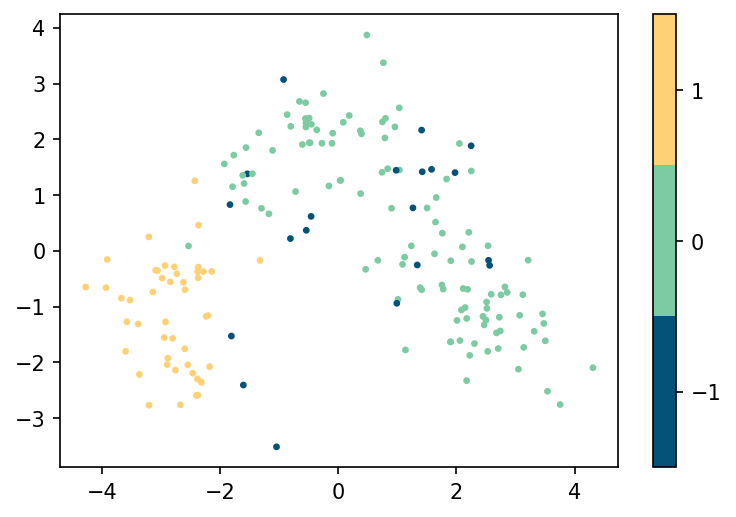

In [56]:
pca = PCA(2)
pca_embedding_dbscan = pca.fit_transform(wine)

dff = pd.DataFrame(pca_embedding_dbscan)
dff["label"] = dbscan.labels_
dff.columns = ['x', 'y', 'label']
dff

cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#7CCBA2','#FED176'])
bounds = np.linspace(-1.5, 1.5, 4)
ti = np.linspace(-1, 1, 3)

plt.figure(dpi=150)
plt.scatter(dff.x, dff.y, c = dff.label, s=5, cmap=cmap2)
plt.colorbar(boundaries=bounds, spacing='proportional', ticks=ti)

#### Miary wewnętrzne

In [57]:
ss_dbscan = silhouette_score(wine, dbscan.labels_)
silhouette_scores.append(ss_dbscan) 
silhouette_scores

[0.28594199657074876, 0.2774439826952266, 0.22490883609486223]

In [58]:
chs_dbscan = calinski_harabasz_score(wine, dbscan.labels_)
calinski_harabasz_scores.append(chs_dbscan) 
calinski_harabasz_scores

[70.83688657175372, 67.6474675044098, 32.18955089061222]

In [59]:
dbs_dbscan = davies_bouldin_score(wine, dbscan.labels_)
davies_bouldin_scores.append(dbs_dbscan) 
davies_bouldin_scores

[1.3917938323177375, 1.4185919431857326, 3.6152937209272955]

#### Miary zewnętrzne

In [60]:
ars_dbscan = adjusted_rand_score(data.target, dbscan.labels_)
adjusted_rand_scores.append(ars_dbscan) 
adjusted_rand_scores

[0.9148795960669529, 0.7899332213582837, 0.4349332692420042]

In [61]:
MI_dbscan = mutual_info_score(data.target, dbscan.labels_)
NMI_dbscan = normalized_mutual_info_score(data.target, dbscan.labels_)
AMI_dbscan = adjusted_mutual_info_score(data.target, dbscan.labels_)
print(MI_dbscan)
print(NMI_dbscan)
print(AMI_dbscan)
mutual_info_scores.append(MI_dbscan) 
mutual_info_scores
normalized_mutual_info_scores.append(NMI_dbscan) 
normalized_mutual_info_scores
adjusted_mutual_info_scores.append(AMI_dbscan) 
adjusted_mutual_info_scores

0.5543748385453996
0.5620024564538024
0.5568089326402884


[0.8914476096236207, 0.7842084168747391, 0.5568089326402884]

In [62]:
HS_dbscan = homogeneity_score(data.target, dbscan.labels_)
CS_dbscan = completeness_score(data.target, dbscan.labels_)
V_dbscan = v_measure_score(data.target, dbscan.labels_, beta=1.0)
print(V_dbscan)
v_measure_scores.append(V_dbscan) 
v_measure_scores

0.5620024564538025


[0.8925851652969188, 0.7864652657004839, 0.5620024564538025]

### GMM

In [63]:
sil_scores=[]
centers=[]
x = range(2,11)

for i in x:
    gmm = GaussianMixture(n_components=i, random_state=10, n_init=5).fit(wine)
    sil_scores.append(silhouette_score(wine, gmm.predict(wine)))
    centers.append(gmm.means_)
    
print(sil_scores)
max(sil_scores)

[0.2685053034647887, 0.28356363134288903, 0.2551713873563878, 0.24572511966239735, 0.22857909662102605, 0.19517821023288387, 0.13415824223176148, 0.12925001443307804, 0.1185308729118333]


0.28356363134288903

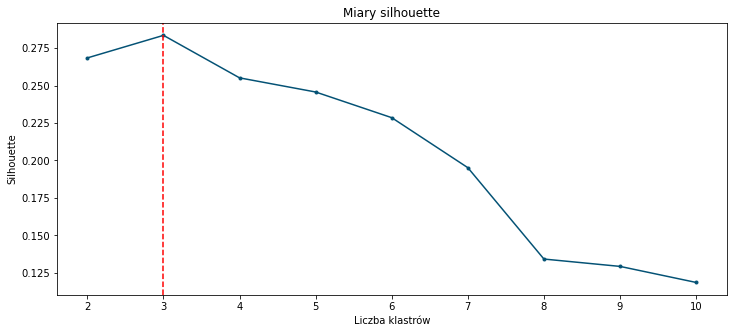

In [64]:
#Metoda do wyznaczenia optymalnej liczby klastów (wykres miary silhouette ~ l.klastrów)
plt.figure(figsize = (12,5))
plt.plot(x, sil_scores,'.-', color='#045275')
plt.ylabel('Silhouette')
plt.xlabel('Liczba klastrów')
plt.title("Miary silhouette")
plt.axvline(3, ls="--", color='red');

In [65]:
gmm_3c = GaussianMixture(n_components=3, random_state=10).fit(wine)
print("Etykiety nadane obserwacjom za pomocą algorytmu GMM:")
print(gmm_3c.predict(wine))

Etykiety nadane obserwacjom za pomocą algorytmu GMM:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [66]:
#Liczebność prognozowanych klas
gmm_labels_sum = pd.DataFrame()
gmm_labels_sum.loc[:,'Klaster'] = gmm_3c.predict(wine)
gmm_labels_sum = gmm_labels_sum.groupby('Klaster').size().to_frame()
gmm_labels_sum.columns = ["Liczba obserwacji"]
gmm_labels_sum

,Liczba obserwacji
Klaster,
0,62
1,65
2,51


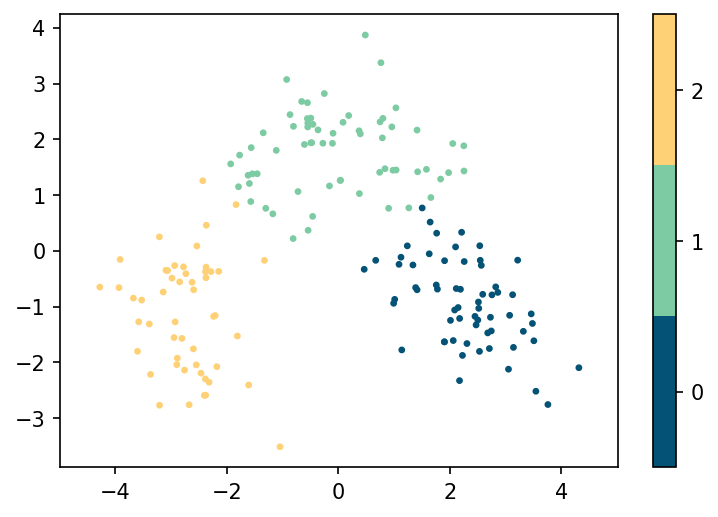

In [67]:
#Wizualizacja wyników grupowania z wykorzystaniem redukcji wymiarowości metodą PCA 
pca = PCA(2)
pca_embedding_gmm = pca.fit_transform(wine)
plot_reduced_data(pca_embedding_gmm, gmm_3c.predict(wine), cmap2)

In [68]:
silhouette_score(wine, gmm_3c.predict(wine))

0.2848589191898987

#### Miary wewnętrzne

In [69]:
ss_gmm = silhouette_score(wine, gmm_3c.predict(wine))
silhouette_scores.append(ss_gmm) 
silhouette_scores

[0.28594199657074876,
 0.2774439826952266,
 0.22490883609486223,
 0.2848589191898987]

In [70]:
chs_gmm = calinski_harabasz_score(wine, gmm_3c.predict(wine))
calinski_harabasz_scores.append(chs_gmm) 
calinski_harabasz_scores

[70.83688657175372, 67.6474675044098, 32.18955089061222, 70.9400080031512]

In [71]:
dbs_gmm = davies_bouldin_score(wine, gmm_3c.predict(wine))
davies_bouldin_scores.append(dbs_gmm) 
davies_bouldin_scores

[1.3917938323177375,
 1.4185919431857326,
 3.6152937209272955,
 1.3891879777181646]

#### Miary zewnętrzne

In [72]:
ars_gmm = adjusted_rand_score(data.target, gmm_3c.predict(wine))
adjusted_rand_scores.append(ars_gmm) 
adjusted_rand_scores

[0.9148795960669529,
 0.7899332213582837,
 0.4349332692420042,
 0.8974949815093207]

In [73]:
MI_gmm = mutual_info_score(data.target, gmm_3c.predict(wine))
NMI_gmm = normalized_mutual_info_score(data.target, gmm_3c.predict(wine))
AMI_gmm = adjusted_mutual_info_score(data.target, gmm_3c.predict(wine))
print(MI_gmm)
print(NMI_gmm)
print(AMI_gmm)
mutual_info_scores.append(MI_gmm) 
mutual_info_scores
normalized_mutual_info_scores.append(NMI_gmm) 
normalized_mutual_info_scores
adjusted_mutual_info_scores.append(AMI_gmm) 
adjusted_mutual_info_scores

0.9544575015299441
0.8758935341223069
0.8745794404379261


[0.8914476096236207,
 0.7842084168747391,
 0.5568089326402884,
 0.8745794404379261]

In [74]:
HS_gmm = homogeneity_score(data.target, gmm_3c.predict(wine))
CS_gmm = completeness_score(data.target, gmm_3c.predict(wine))
V_gmm = v_measure_score(data.target, gmm_3c.predict(wine), beta=1.0)
print(V_gmm)
v_measure_scores.append(V_gmm) 
v_measure_scores

0.875893534122307


[0.8925851652969188, 0.7864652657004839, 0.5620024564538025, 0.875893534122307]

#### Zestawienie jakości wyników wszystkich metod grupowania

In [75]:
array = np.array([silhouette_scores,calinski_harabasz_scores,davies_bouldin_scores,adjusted_rand_scores,mutual_info_scores,normalized_mutual_info_scores,adjusted_mutual_info_scores,v_measure_scores])
  
index_values = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score','adjusted_rand_score','mutual_info_score',
                'normalized_mutual_info_scores','adjusted_mutual_info_scores', 'v_measure_scores']
column_values = ['k-means', 'agglomerative', 'dbscan',
                'gmm']
  
df = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)
df

,k-means,agglomerative,dbscan,gmm
silhouette_score,0.29,0.28,0.22,0.28
calinski_harabasz_score,70.84,67.65,32.19,70.94
davies_bouldin_score,1.39,1.42,3.62,1.39
adjusted_rand_score,0.91,0.79,0.43,0.90
mutual_info_score,0.97,0.86,0.55,0.95
normalized_mutual_info_scores,0.89,0.79,0.56,0.88
adjusted_mutual_info_scores,0.89,0.78,0.56,0.87
v_measure_scores,0.89,0.79,0.56,0.88


## Badanie synergii metod redukcji wymiarowości i segmentacji na przykładzie ekspresji genów raka piersi

Dane <b>Curated Microarray Database (CuMiDa)</b> wykorzystane w tej część są dostępne m.in na platformie Kaggle pod adresem: https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida?resource=download

In [76]:
from sklearn.model_selection import GridSearchCV
from pandas import Categorical
import sklearn.cluster as cluster
from sklearn.preprocessing  import OrdinalEncoder
from scipy.stats import entropy

In [77]:
#Wczytanie zbioru danych GSE45827 pobranych z repozytorium CuMiDa
data = pd.read_csv('Breast_GSE45827.csv')
cumida = pd.DataFrame(data)

In [78]:
#Wielkość zbioru
cumida.shape

(151, 54677)

In [79]:
cumida.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.85,8.10,6.42,7.35,3.03,6.88,4.96,4.41,...,12.23,11.85,13.66,13.48,6.27,5.02,4.90,2.97,3.51,3.30
1,85,basal,9.86,8.21,7.06,7.69,3.15,7.54,5.13,4.58,...,12.18,11.81,13.75,13.47,6.77,5.29,5.41,2.93,3.69,3.06
2,87,basal,10.10,8.94,5.74,7.69,3.13,6.56,4.81,4.43,...,12.13,11.73,13.62,13.30,6.35,5.17,5.18,2.85,3.55,3.16
3,90,basal,9.76,7.36,6.48,6.99,3.18,7.80,5.49,4.57,...,12.11,11.72,13.74,13.51,6.61,5.19,5.09,3.03,3.52,3.27
4,91,basal,9.41,7.75,6.69,7.33,3.17,7.61,5.37,4.42,...,12.17,11.86,13.80,13.54,6.41,5.04,5.24,2.96,3.45,3.19


In [80]:
#Wartości brakujące
cumida.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [81]:
cumida.isnull().sum().sum()

0

In [82]:
#Liczebności i udziały procentowe klas w całym zbiorze
class_freq = pd.DataFrame(data.type.value_counts())
class_freq = class_freq.rename_axis("klasa/typ tkanki")
class_freq.columns = ["Liczba próbek"]
class_freq["% udział w zbiorze"] = ((class_freq['Liczba próbek']/151)*100).round(0).astype(int)
class_freq

,Liczba próbek,% udział w zbiorze
klasa/typ tkanki,,
basal,41,27
HER,30,20
luminal_B,30,20
luminal_A,29,19
cell_line,14,9
normal,7,5


In [83]:
#Badanie entropii zbioru
class_distribution = np.array([41, 30, 30, 29, 14, 7])
ent = entropy(class_distribution)  # Use base 2 for binary entropy
print(ent)

1.6759020198466166


In [84]:
class_distribution = np.array([41, 30, 30, 29, 14, 7])

# Calculate proportions of each class
total_samples = np.sum(class_distribution)
class_proportions = class_distribution / total_samples

# Calculate multi-class entropy
multiclass_ent = entropy(class_proportions, base=2)
print(multiclass_ent)

2.417815533048511


In [85]:
#Przekodowanie etykiet na numeryczne 
typ_nowotworu = pd.DataFrame()
typ_nowotworu['type'] = (cumida)['type']

custom_order = ['basal', 'HER', 'luminal_A','luminal_B','cell_line','normal']
categorized = pd.Categorical(typ_nowotworu['type'], categories=custom_order, ordered=True)
encoded_labels, _ = pd.factorize(categorized, sort=True)
typ_nowotworu['encoded_type'] = encoded_labels
print(typ_nowotworu)
tl=typ_nowotworu['encoded_type']
truelabels = tl

          type  encoded_type
0        basal             0
1        basal             0
2        basal             0
3        basal             0
4        basal             0
..         ...           ...
146  luminal_B             3
147  luminal_B             3
148  luminal_B             3
149  luminal_B             3
150  luminal_B             3

[151 rows x 2 columns]


In [86]:
class_freq['Nowa etykieta'] = [0,1,3,2,4,5]
class_freq = class_freq.sort_values(by='Nowa etykieta')
class_freq

,Liczba próbek,% udział w zbiorze,Nowa etykieta
klasa/typ tkanki,,,
basal,41,27,0
HER,30,20,1
luminal_A,29,19,2
luminal_B,30,20,3
cell_line,14,9,4
normal,7,5,5


In [87]:
#Usunięcie kolumn z prawdziwymi etykietami i częstościami
cumida.head()
cumida.drop(['type','samples'], axis=1, inplace=True)

In [88]:
#Opisowe miary statystyczne zbioru
cumida.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,...,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00
mean,10.34,7.63,6.22,7.34,3.19,7.31,5.32,4.71,7.79,3.90,...,12.36,11.82,14.02,13.77,7.62,5.70,6.19,2.92,3.62,3.17
std,0.61,0.71,0.65,0.33,0.16,0.64,0.29,0.31,1.65,0.48,...,0.32,0.37,0.25,0.29,0.86,0.86,0.95,0.09,0.15,0.10
min,7.51,5.86,4.76,6.63,2.76,5.46,4.65,3.95,3.87,3.28,...,11.65,10.94,13.42,13.19,5.73,4.33,4.30,2.73,3.30,2.94
25%,10.10,7.17,5.80,7.11,3.08,6.87,5.13,4.47,6.80,3.63,...,12.15,11.59,13.81,13.52,6.88,4.97,5.34,2.86,3.53,3.11
50%,10.42,7.53,6.24,7.33,3.19,7.42,5.27,4.66,7.91,3.77,...,12.32,11.83,14.00,13.74,7.80,5.49,6.21,2.91,3.62,3.16
75%,10.74,8.05,6.61,7.51,3.28,7.76,5.46,4.94,8.89,4.05,...,12.53,12.02,14.23,14.03,8.20,6.45,7.05,2.96,3.70,3.23
max,11.68,9.63,8.36,8.37,3.61,8.57,6.36,5.89,11.71,6.83,...,13.51,13.12,14.62,14.48,10.29,8.11,9.12,3.32,4.16,3.45


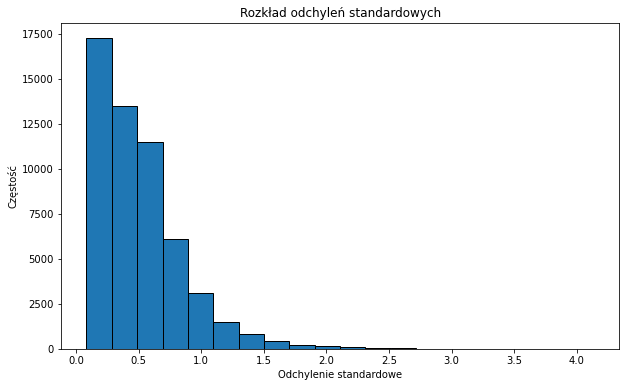

In [89]:
#Sprawdzenie rozkładu odchyleń standardowych
std_values = cumida.std()
plt.figure(figsize=(10, 6))
plt.hist(std_values, bins=20, edgecolor='black')
plt.xlabel('Odchylenie standardowe')
plt.ylabel('Częstość')
plt.title('Rozkład odchyleń standardowych')
plt.show()

In [90]:
print("Maksymalne odchylenie: " + str(std_values.max()))
print("Minimalne odchylenie: " + str(std_values.min()))

Maksymalne odchylenie: 4.133279081968066
Minimalne odchylenie: 0.08411217203686715


In [91]:
#Standaryzacja zmiennych
cumida_sc = pd.DataFrame(StandardScaler().fit(cumida).transform(cumida))
cumida_sc.columns=["V"+str(i) for i in range(1, (len(cumida.columns)+1))]
cumida_sc.head()

df = cumida_sc
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V54666,V54667,V54668,V54669,V54670,V54671,V54672,V54673,V54674,V54675
0,-0.80,0.66,0.31,0.04,-0.99,-0.67,-1.23,-0.99,0.66,-1.30,...,-0.41,0.08,-1.42,-1.02,-1.59,-0.80,-1.35,0.52,-0.80,1.26
1,-0.78,0.82,1.30,1.05,-0.23,0.36,-0.66,-0.42,-0.01,-0.65,...,-0.57,-0.04,-1.06,-1.05,-0.99,-0.48,-0.82,0.17,0.44,-1.08
2,-0.39,1.85,-0.76,1.06,-0.37,-1.17,-1.74,-0.94,0.99,-0.73,...,-0.74,-0.26,-1.57,-1.65,-1.49,-0.61,-1.05,-0.77,-0.51,-0.15
3,-0.95,-0.39,0.40,-1.07,-0.02,0.77,0.57,-0.48,0.75,-1.23,...,-0.78,-0.28,-1.09,-0.91,-1.18,-0.59,-1.16,1.22,-0.68,0.97
4,-1.52,0.16,0.73,-0.02,-0.10,0.47,0.17,-0.94,0.98,-1.11,...,-0.59,0.10,-0.87,-0.80,-1.41,-0.77,-1.00,0.40,-1.23,0.20


In [92]:
#Opisowe miary statystyczne zbioru po standaryzacji
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V54666,V54667,V54668,V54669,V54670,V54671,V54672,V54673,V54674,V54675
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,...,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.63,-2.52,-2.27,-2.14,-2.68,-2.90,-2.31,-2.50,-2.39,-1.30,...,-2.23,-2.40,-2.37,-2.01,-2.21,-1.60,-1.98,-2.00,-2.24,-2.33
25%,-0.39,-0.66,-0.66,-0.71,-0.69,-0.68,-0.65,-0.81,-0.60,-0.57,...,-0.66,-0.63,-0.83,-0.86,-0.86,-0.85,-0.89,-0.62,-0.63,-0.63
50%,0.13,-0.14,0.02,-0.02,0.02,0.17,-0.17,-0.17,0.08,-0.28,...,-0.12,0.02,-0.06,-0.11,0.20,-0.24,0.02,-0.08,-0.06,-0.10
75%,0.65,0.60,0.60,0.53,0.60,0.70,0.45,0.74,0.67,0.30,...,0.53,0.54,0.85,0.88,0.67,0.87,0.91,0.46,0.51,0.55
max,2.19,2.83,3.33,3.14,2.69,1.97,3.53,3.83,2.39,6.10,...,3.62,3.52,2.39,2.45,3.12,2.81,3.09,4.35,3.70,2.74


In [93]:
#Redukcja wymiarowości zbioru danych do 2 wymiarów za pomocą rozważanych 4 metod
pca_2d = PCA(n_components =2,random_state=40).fit_transform(df)
isomap_2d = Isomap(n_components =2,n_neighbors = 20).fit_transform(df)
tsne_2d = TSNE(n_components =2,random_state=40).fit_transform(df)
umap_2d = umap.UMAP(n_components =2,n_neighbors =20,random_state=40).fit_transform(df)

C:\Users\MSI-PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MSI-PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


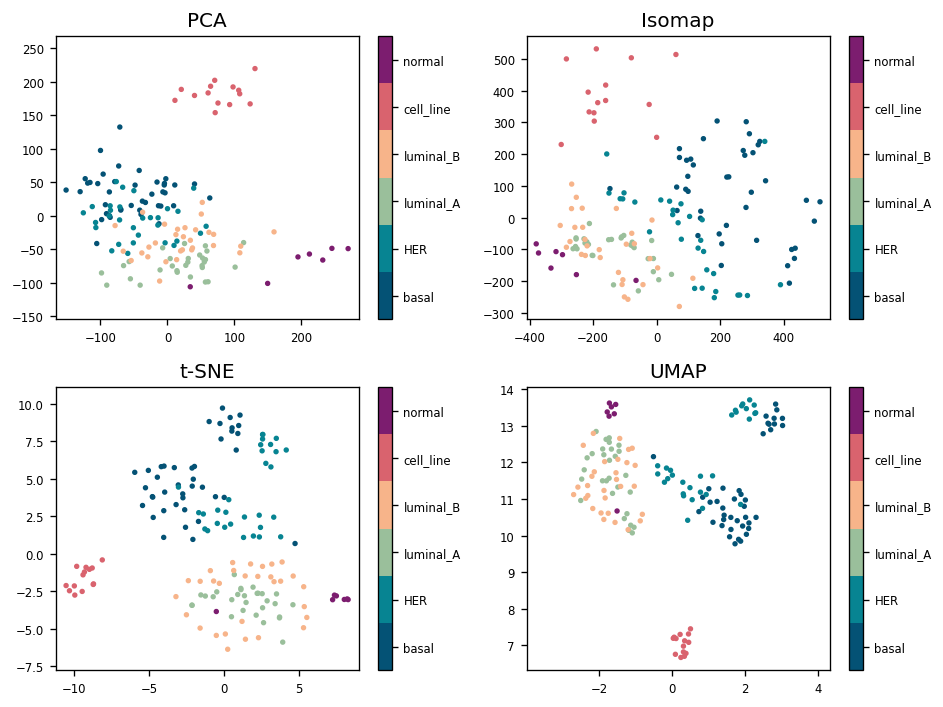

In [94]:
#Wizualizacja rezultatów redukcji wymiarów za pomocą różnych metod
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#089099','#FCDE9C','#F0746E','#7C1D6F'])

def plot_reduced_data(embedding, color_col, cmap, title):
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.title(title)
    plt.tick_params(axis='both', which='major', labelsize=7)
    custom_labels = ['basal', 'HER','luminal_A','luminal_B', 'cell_line', 'normal']
    cbar = plt.colorbar(boundaries=np.arange(n+1)-0.5, ticks=np.arange(n))
    cbar.set_ticklabels(custom_labels, fontsize=7)
    
fig = plt.figure(dpi=120, figsize=(8, 6))

plt.subplot(2, 2, 1)  # Top-left subplot
plot_reduced_data(pca_2d, tl, cmap1, 'PCA')
 
plt.subplot(2, 2, 2)  # Top-right subplot
plot_reduced_data(isomap_2d, tl, cmap1, 'Isomap')

plt.subplot(2, 2, 3)  # Bottom-left subplot
plot_reduced_data(tsne_2d, tl, cmap1, 't-SNE')

plt.subplot(2, 2, 4)  # Bottom-right subplot
plot_reduced_data(umap_2d, tl, cmap1, 'UMAP')

plt.tight_layout()
plt.show()

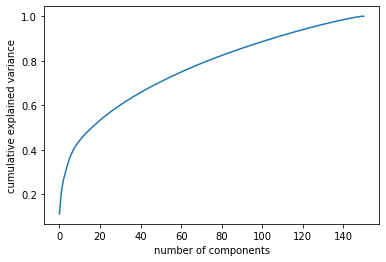

In [95]:
#Wykres części objaśnianej wariancji ~ l. komponentów dla metody PCA
pca_plot = PCA().fit(df)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [96]:
#Miary oceny jakości grupowania - AMI, ARI, V-measure
def M1(est,x,y= truelabels):
    predicted_lb = est.fit_predict(x)
    metryka = metrics.v_measure_score(truelabels,predicted_lb)
    return metryka

def M2(est,x,y= truelabels):
    predicted_lb = est.fit_predict(x)
    metryka = metrics.adjusted_rand_score(truelabels,predicted_lb)
    return metryka
                                        
def M3(est,x,y= truelabels):
    predicted_lb = est.fit_predict(x)
    metryka = metrics.adjusted_mutual_info_score(truelabels,predicted_lb)
    return metryka
                                               
miary = {'M1': M1, 'M2':M2, 'M3': M3}
DR_tech=['pca', 'isomap', 'tsne', 'umap']
DR=[pca_2d, isomap_2d, tsne_2d, umap_2d]

In [125]:
#K-ŚREDNICH
parametry_grid = {"n_clusters": [2,3,4,5,6,7,8]}
testowanie = GridSearchCV(
    cluster.KMeans(random_state=44),
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], 
    refit=False)

ksrednich_wyniki =[]

#Testowanie grupowania z różnymi wartościami parametrów wejściowych na 4 zbiorach po redukcji wymiarowości
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    ksrednich_wyniki.append(pd.DataFrame(testowanie.cv_results_))

#Kombinacje, dla których osiągnięto max ARI, AMI i V
for i in range(len(ksrednich_wyniki)):
    print('METODA GRUPOWANIA: K-średnich','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M1 ==
            ksrednich_wyniki[i].mean_test_M1.max()],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M2 ==
            ksrednich_wyniki[i].mean_test_M2.max()],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M3 ==
            ksrednich_wyniki[i].mean_test_M3.max()])

#Zapisanie najlepszych wyników grupowania dla każdej metody DR
ksrednich_pca = (ksrednich_wyniki[0].iloc[5])
ksrednich_isomap = (ksrednich_wyniki[1].iloc[1])
ksrednich_tsne = (ksrednich_wyniki[2].iloc[1])
ksrednich_umap = (ksrednich_wyniki[3].iloc[4])

kmeans_wyniki_fin = pd.DataFrame(ksrednich_pca)
kmeans_wyniki_fin["Isomap"]=ksrednich_isomap.values
kmeans_wyniki_fin["t-SNE"]=ksrednich_tsne.values
kmeans_wyniki_fin["UMAP"]=ksrednich_umap.values
kmeans_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
kmeans_wyniki_fin

METODA GRUPOWANIA: K-średnich 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.161723      0.000000         0.412296        0.000000   

  param_n_clusters             params  split0_test_M1  mean_test_M1  \
5                7  {'n_clusters': 7}        0.503400      0.503400   

   std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  std_test_M2  \
5     0.000000             1        0.297744      0.297744     0.000000   

   rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  rank_test_M3  
5             4        0.469538      0.469538     0.000000             1   
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.129966      0.000000         0.344949        0.000000   

  param_n_clusters             params  split0_test_M1  mean_test_M1  \
3                5  {'n_clusters': 5}        0.487046      0.487046   

   std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  std_test_M2  

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.161723,0.085646,0.097522,0.106463
std_fit_time,0.000000,0.000000,0.000000,0.000000
mean_score_time,0.412296,0.275834,0.301922,0.326069
std_score_time,0.000000,0.000000,0.000000,0.000000
param_n_clusters,7,3,3,6
params,{'n_clusters': 7},{'n_clusters': 3},{'n_clusters': 3},{'n_clusters': 6}
split0_test_M1,0.503400,0.579074,0.624583,0.633370
mean_test_M1,0.503400,0.579074,0.624583,0.633370
std_test_M1,0.000000,0.000000,0.000000,0.000000
rank_test_M1,1,1,1,1


In [98]:
#HIERARCHICZNE
parametry_grid = {"n_clusters": [2,3,4,5,6,7],'linkage': ['ward','single','complete','average']}
testowanie = GridSearchCV(
    cluster.AgglomerativeClustering(),
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], refit=False)

hierarchiczne_wyniki = []

#Testowanie grupowania z różnymi wartościami parametrów wejściowych na 4 zbiorach po redukcji wymiarowości
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    hierarchiczne_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(hierarchiczne_wyniki)):
    print('METODA GRUPOWANIA: Hierarchiczne','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M1 ==
            hierarchiczne_wyniki[i].mean_test_M1.max()],'\n', 
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M2 ==
            hierarchiczne_wyniki[i].mean_test_M2.max()],'\n',
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M3 ==
            hierarchiczne_wyniki[i].mean_test_M3.max()])
    
hier_pca = (hierarchiczne_wyniki[0].iloc[20])
hier_isomap = (hierarchiczne_wyniki[1].iloc[19])
hier_tsne = (hierarchiczne_wyniki[2].iloc[11])
hier_umap = (hierarchiczne_wyniki[3].iloc[19])

hier_wyniki_fin = pd.DataFrame(hier_pca)
hier_wyniki_fin["Isomap"]=hier_isomap.values
hier_wyniki_fin["t-SNE"]=hier_tsne.values
hier_wyniki_fin["UMAP"]=hier_umap.values
hier_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
hier_wyniki_fin

METODA GRUPOWANIA: Hierarchiczne 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22           0.00          0.00             0.02            0.00   

   param_linkage param_n_clusters                                   params  \
22       average                6  {'linkage': 'average', 'n_clusters': 6}   

    split0_test_M1  mean_test_M1  std_test_M1  rank_test_M1  split0_test_M2  \
22            0.57          0.57         0.00             1            0.39   

    mean_test_M2  std_test_M2  rank_test_M2  split0_test_M3  mean_test_M3  \
22          0.39         0.00             2            0.54          0.54   

    std_test_M3  rank_test_M3  
22         0.00             2   
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20           0.00          0.00             0.02            0.00   

   param_linkage param_n_clusters                                   params  \
20       average                4  {'lin

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.00,0.01,0.00,0.00
std_fit_time,0.00,0.00,0.00,0.00
mean_score_time,0.02,0.02,0.02,0.01
std_score_time,0.00,0.00,0.00,0.00
param_linkage,average,average,single,average
param_n_clusters,4,3,7,3
params,"{'linkage': 'average', 'n_clusters': 4}","{'linkage': 'average', 'n_clusters': 3}","{'linkage': 'single', 'n_clusters': 7}","{'linkage': 'average', 'n_clusters': 3}"
split0_test_M1,0.56,0.56,0.73,0.72
mean_test_M1,0.56,0.56,0.73,0.72
std_test_M1,0.00,0.00,0.00,0.00


In [99]:
#DBSCAN
parametry_grid = {"min_samples": [10,20,40,60,80,100,120],'eps': [0.25,0.5,5,10,20,30,40,50,100,150]}
testowanie = GridSearchCV(
    cluster.DBSCAN(),
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], refit=False)

dbscan_wyniki =[]

#Testowanie grupowania z różnymi wartościami parametrów wejściowych na 4 zbiorach po redukcji wymiarowości
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    dbscan_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(dbscan_wyniki)):
    print('METODA GRUPOWANIA: DBSCAN','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            dbscan_wyniki[i].loc[
            dbscan_wyniki[i].mean_test_M1 ==
            dbscan_wyniki[i].mean_test_M1.max()],'\n', 
            dbscan_wyniki[i].loc[
            dbscan_wyniki[i].mean_test_M2 ==
            dbscan_wyniki[i].mean_test_M2.max()],'\n',
            dbscan_wyniki[i].loc[
            dbscan_wyniki[i].mean_test_M3 ==
            dbscan_wyniki[i].mean_test_M3.max()])

#Sprawdzenie optymalnych wartości parametru eps do badania
# neighbors_fit = NearestNeighbors(n_neighbors=25).fit(um_2d)
# distances, indices = neighbors_fit.kneighbors(um_2d)
# distances = np.sort(distances[:,1], axis=0)    

# plt.figure(figsize = (12,5))
# plt.plot(distances, color='#045275')
# plt.ylabel('epsilon')
# plt.xlabel('Liczba punktów danych posortowanych za pomocą odległości do 26 najbliższych sąsiadów')
# plt.title("Metoda 'kolana'")
# plt.grid(False)

dbscan_pca = (dbscan_wyniki[0].iloc[49])
dbscan_isomap = (dbscan_wyniki[1].iloc[65])
dbscan_tsne = (dbscan_wyniki[2].iloc[15])
dbscan_umap = (dbscan_wyniki[3].iloc[7])

dbscan_wyniki_fin = pd.DataFrame(dbscan_pca)
dbscan_wyniki_fin["Isomap"]=dbscan_isomap.values
dbscan_wyniki_fin["t-SNE"]=dbscan_tsne.values
dbscan_wyniki_fin["UMAP"]=dbscan_umap.values
dbscan_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
dbscan_wyniki_fin

METODA GRUPOWANIA: DBSCAN 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
49           0.00          0.00             0.03            0.00        50   

   param_min_samples                          params  split0_test_M1  \
49                10  {'eps': 50, 'min_samples': 10}            0.38   

    mean_test_M1  std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  \
49          0.38         0.00             1            0.13          0.13   

    std_test_M2  rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  \
49         0.00             1            0.35          0.35         0.00   

    rank_test_M3  
49             1   
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
49           0.00          0.00             0.03            0.00        50   

   param_min_samples                          params  split0_test_M1  \
49                10  {'eps': 50, 'min_samples': 10}     

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.00,0.00,0.00,0.00
std_fit_time,0.00,0.00,0.00,0.00
mean_score_time,0.03,0.02,0.01,0.01
std_score_time,0.00,0.00,0.00,0.00
param_eps,50,150,5,0.50
param_min_samples,10,40,20,10
params,"{'eps': 50, 'min_samples': 10}","{'eps': 150, 'min_samples': 40}","{'eps': 5, 'min_samples': 20}","{'eps': 0.5, 'min_samples': 10}"
split0_test_M1,0.38,0.37,0.27,0.61
mean_test_M1,0.38,0.37,0.27,0.61
std_test_M1,0.00,0.00,0.00,0.00


In [100]:
#GMM
parametry_grid = {"n_components": [2,3,4,5,6,7,8,9,10], "covariance_type":['full', 'tied', 'diag', 'spherical']}
testowanie = GridSearchCV(
    mixture.GaussianMixture(random_state=44),    
    parametry_grid,
    scoring = miary,
    cv=[( slice(None), slice(None))], refit=False)

gmm_wyniki = []

#Testowanie grupowania z różnymi wartościami parametrów wejściowych na 4 zbiorach po redukcji wymiarowości
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    gmm_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(gmm_wyniki)):
    print('METODA GRUPOWANIA: GMM','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n',
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M1 ==
            gmm_wyniki[i].mean_test_M1.max()],'\n', 
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M2 ==
            gmm_wyniki[i].mean_test_M2.max()],'\n', 
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M3 ==
            gmm_wyniki[i].mean_test_M3.max()])
    

gmm_pca = (gmm_wyniki[0].iloc[20])
gmm_isomap = (gmm_wyniki[1].iloc[29])
gmm_tsne = (gmm_wyniki[2].iloc[19])
gmm_umap = (gmm_wyniki[3].iloc[17])

gmm_wyniki_fin = pd.DataFrame(gmm_pca)
gmm_wyniki_fin["Isomap"]=gmm_isomap.values
gmm_wyniki_fin["t-SNE"]=gmm_tsne.values
gmm_wyniki_fin["UMAP"]=gmm_umap.values
gmm_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
gmm_wyniki_fin

METODA GRUPOWANIA: GMM 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20           0.02          0.00             0.06            0.00   

   param_covariance_type param_n_components  \
20                  diag                  4   

                                            params  split0_test_M1  \
20  {'covariance_type': 'diag', 'n_components': 4}            0.57   

    mean_test_M1  std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  \
20          0.57         0.00             1            0.41          0.41   

    std_test_M2  rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  \
20         0.00             2            0.55          0.55         0.00   

    rank_test_M3  
20             1   
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30           0.02          0.00             0.05            0.00   

   param_covariance_type param_n_components  \
30             spherical          

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.02,0.01,0.02,0.03
std_fit_time,0.00,0.00,0.00,0.00
mean_score_time,0.06,0.05,0.06,0.11
std_score_time,0.00,0.00,0.00,0.00
param_covariance_type,diag,spherical,diag,tied
param_n_components,4,4,3,10
params,"{'covariance_type': 'diag', 'n_components': 4}","{'covariance_type': 'spherical', 'n_components...","{'covariance_type': 'diag', 'n_components': 3}","{'covariance_type': 'tied', 'n_components': 10}"
split0_test_M1,0.57,0.52,0.72,0.67
mean_test_M1,0.57,0.52,0.72,0.67
std_test_M1,0.00,0.00,0.00,0.00


In [101]:
v_array = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M1']])
v_array = v_array.append([hier_wyniki_fin.loc['mean_test_M1']])
v_array = v_array.append([dbscan_wyniki_fin.loc['mean_test_M1']])
v_array = v_array.append([gmm_wyniki_fin.loc['mean_test_M1']])
v_array["V-measure"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
v_array = v_array.set_index("V-measure")

ARI_array = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M2']])
ARI_array = ARI_array.append([hier_wyniki_fin.loc['mean_test_M2']])
ARI_array = ARI_array.append([dbscan_wyniki_fin.loc['mean_test_M2']])
ARI_array = ARI_array.append([gmm_wyniki_fin.loc['mean_test_M2']])
ARI_array["ARI"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
ARI_array = ARI_array.set_index("ARI")

AMI_array = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M3']])
AMI_array = AMI_array.append([hier_wyniki_fin.loc['mean_test_M3']])
AMI_array = AMI_array.append([dbscan_wyniki_fin.loc['mean_test_M3']])
AMI_array = AMI_array.append([gmm_wyniki_fin.loc['mean_test_M3']])
AMI_array["AMI"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
AMI_array = AMI_array.set_index("AMI")

pd.options.display.float_format = '{:.6f}'.format

C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\1069616065.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array = v_array.append([hier_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\1069616065.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array = v_array.append([dbscan_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\1069616065.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array = v_array.append([gmm_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\1069616065.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [102]:
v_array

,PCA,Isomap,t-SNE,UMAP
V-measure,,,,
k-średnich,NaN,NaN,NaN,NaN
aglomeracyjne,0.562654,0.564479,0.731211,0.717236
DBSCAN,0.375128,0.367076,0.273747,0.611014
GMM,0.565299,0.522232,0.717236,0.665928


In [103]:
ARI_array

,PCA,Isomap,t-SNE,UMAP
ARI,,,,
k-średnich,NaN,NaN,NaN,NaN
aglomeracyjne,0.408854,0.409137,0.502321,0.506105
DBSCAN,0.133473,0.273690,0.083956,0.436734
GMM,0.412013,0.344493,0.506105,0.454876


In [104]:
AMI_array

,PCA,Isomap,t-SNE,UMAP
AMI,,,,
k-średnich,NaN,NaN,NaN,NaN
aglomeracyjne,0.544858,0.552193,0.712299,0.709215
DBSCAN,0.352782,0.357741,0.259620,0.588173
GMM,0.547607,0.503577,0.709215,0.634139


### Wizualizacja danych po redukcji wymiarowości i grupowaniu dla najlepszych kombinacji metod

In [105]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#089099','#FCDE9C','#F0746E','#7C1D6F'])

def plot_reduced_data(embedding, color_col, cmap, title):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(title)
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

#### DR: PCA, clustering: gmm

In [106]:
pca_gmm = GaussianMixture(n_components = 4, covariance_type='diag',random_state=44).fit(pca_2d)
print("Etykiety nadane obserwacjom za pomocą algorytmu GMM:")
print(pca_gmm.predict(pca_2d))

Etykiety nadane obserwacjom za pomocą algorytmu GMM:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 1 2 2 2 0 2 2 2 2 1 0 2 2 2 2 2 2
 0 2 2]


ARI = 0.4120131506201236
AMI = 0.5476065643044093
V-measure = 0.5652992110907341


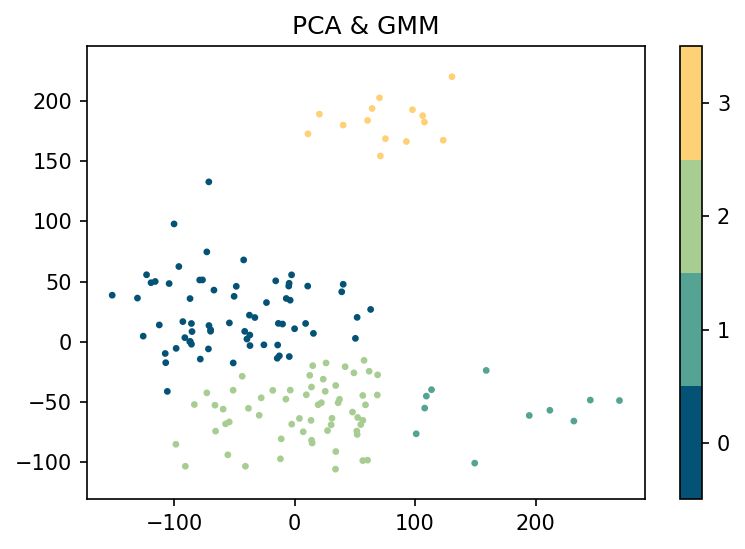

In [107]:
print("ARI = " + str(adjusted_rand_score(tl, pca_gmm.predict(pca_2d))))
print("AMI = " + str(adjusted_mutual_info_score(tl, pca_gmm.predict(pca_2d))))
print("V-measure = " + str(v_measure_score(tl, pca_gmm.predict(pca_2d))))

plot_reduced_data(pca_2d, pca_gmm.predict(pca_2d), cmap2, 'PCA & GMM')

#### DR: Isomap, clustering: k-means

In [108]:
isomap_km = KMeans(n_clusters = 3, random_state=44).fit(isomap_2d)
print("Etykiety nadane obserwacjom za pomocą algorytmu k-średnich:")
print(isomap_km.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu k-średnich:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 0 0 0 0 1 0 0 0 1 1 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1]


ARI = 0.418921665284664
AMI = 0.5671961975993954
V-measure = 0.5790739057113163


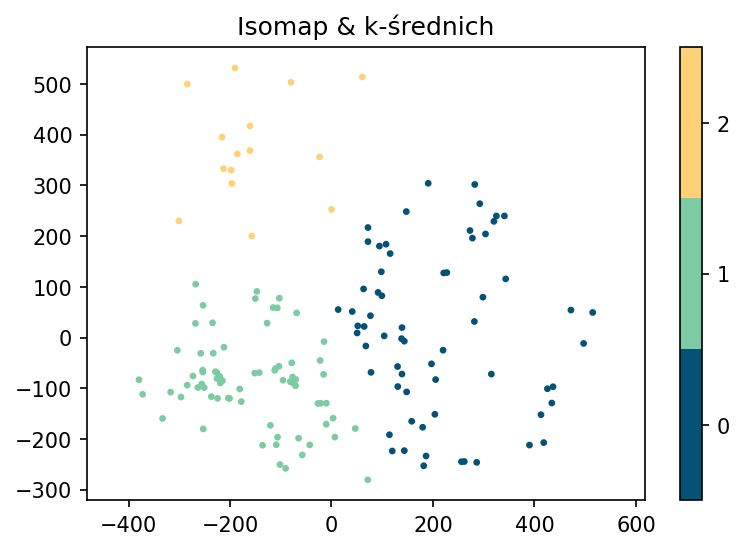

In [109]:
print("ARI = " + str(adjusted_rand_score(tl, isomap_km.labels_)))
print("AMI = " + str(adjusted_mutual_info_score(tl, isomap_km.labels_)))
print("V-measure = " + str(v_measure_score(tl, isomap_km.labels_)))

plot_reduced_data(isomap_2d, isomap_km.labels_, cmap2, 'Isomap & k-średnich')

#### DR: t-SNE, clustering: agglomerative

In [110]:
tsne_agg = AgglomerativeClustering(n_clusters = 7, linkage='single').fit(tsne_2d)
print("Etykiety nadane obserwacjom za pomocą algorytmu Agglomerative:")
print(tsne_agg.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu Agglomerative:
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 6 2 6 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


ARI = 0.5023208158895615
AMI = 0.7122994089609008
V-measure = 0.7312114241638253


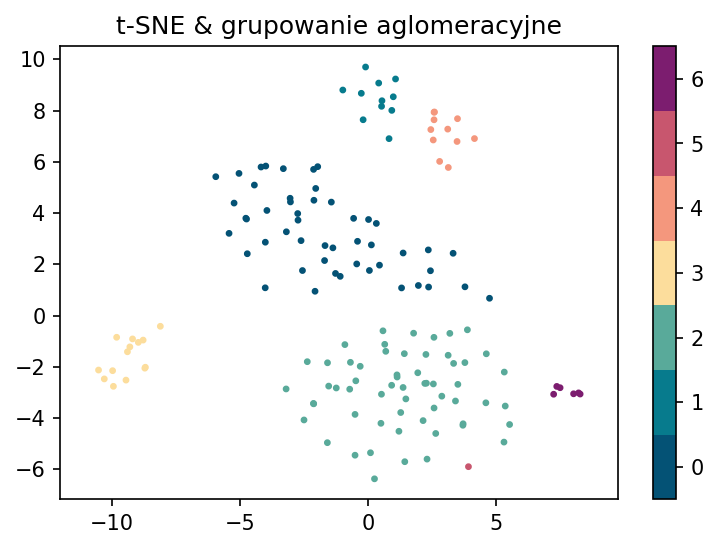

In [111]:
print("ARI = " + str(adjusted_rand_score(tl, tsne_agg.labels_)))
print("AMI = " + str(adjusted_mutual_info_score(tl, tsne_agg.labels_)))
print("V-measure = " + str(v_measure_score(tl, tsne_agg.labels_)))

plot_reduced_data(tsne_2d, tsne_agg.labels_, cmap1, 't-SNE & grupowanie aglomeracyjne')

#### DR: UMAP, clustering: agglomerative

In [112]:
umap_agg = AgglomerativeClustering(n_clusters = 3, linkage='average').fit(umap_2d)
print("Etykiety nadane obserwacjom za pomocą algorytmu GMM:")
print(umap_agg.labels_)

Etykiety nadane obserwacjom za pomocą algorytmu GMM:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


ARI = 0.5061046729110147
AMI = 0.7092152172521353
V-measure = 0.7172361149311611


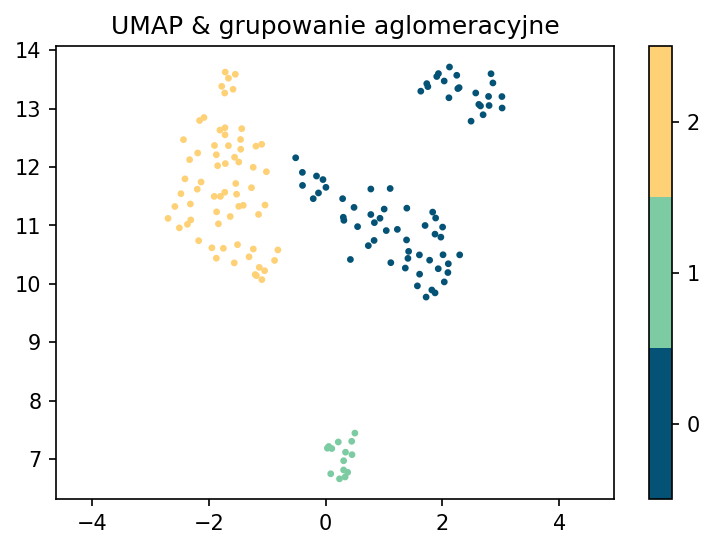

In [113]:
print("ARI = " + str(adjusted_rand_score(tl, umap_agg.labels_)))
print("AMI = " + str(adjusted_mutual_info_score(tl, umap_agg.labels_)))
print("V-measure = " + str(v_measure_score(tl, umap_agg.labels_)))

plot_reduced_data(umap_2d, umap_agg.labels_, cmap2, 'UMAP & grupowanie aglomeracyjne')

#### PORÓWNIANIE WSZYSTKICH

In [114]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#045275','#089099','#FCDE9C','#F0746E','#7C1D6F'])

def plot_reduced_data1(embedding, color_col, cmap, title):
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(title)
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 
    plt.tick_params(axis='both', which='major', labelsize=7)

In [115]:
def plot_reduced_data2(embedding, color_col, cmap, title):
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap=cmap, s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    m = np.unique(color_col)
    plt.title(title)
    plt.tick_params(axis='both', which='major', labelsize=7)
    custom_labels = ['basal', 'HER','luminal_A','luminal_B', 'cell_line', 'normal']
    cbar = plt.colorbar(boundaries=np.arange(n+1)-0.5, ticks=np.arange(n))
    cbar.set_ticklabels(custom_labels, fontsize=7)

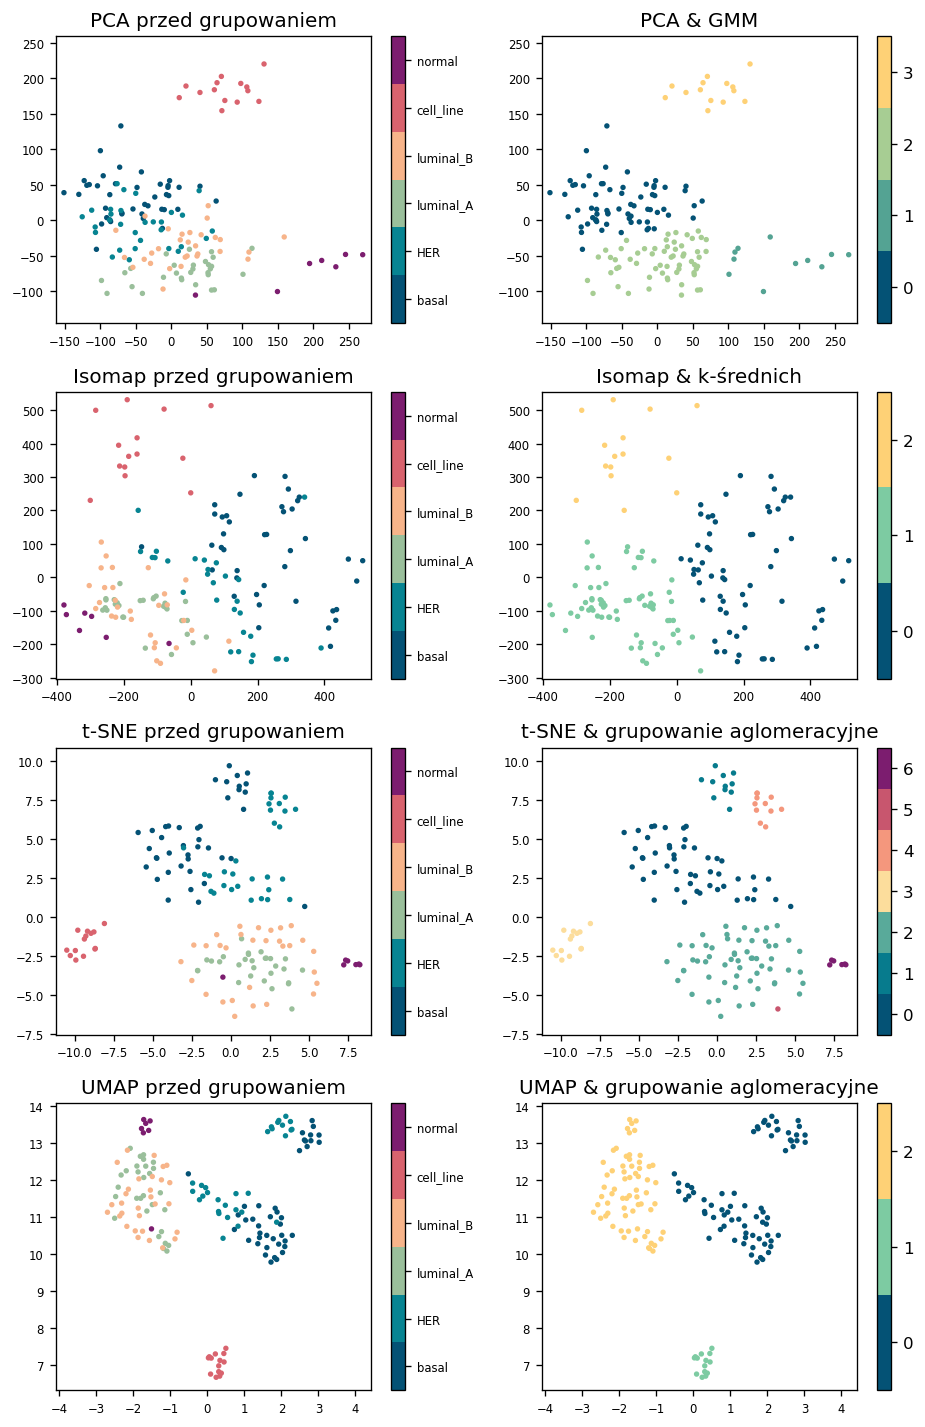

In [116]:
fig = plt.figure(dpi=120, figsize=(8, 12))

plt.subplot(4, 2, 1)
plot_reduced_data2(pca_2d, tl, cmap1, 'PCA przed grupowaniem')

plt.subplot(4, 2, 2)
plot_reduced_data1(pca_2d, pca_gmm.predict(pca_2d), cmap2, 'PCA & GMM')

 
plt.subplot(4, 2, 3)
plot_reduced_data2(isomap_2d, tl, cmap1, 'Isomap przed grupowaniem')

plt.subplot(4, 2, 4)
plot_reduced_data1(isomap_2d, isomap_km.labels_, cmap2, 'Isomap & k-średnich')


plt.subplot(4, 2, 5)
plot_reduced_data2(tsne_2d, tl, cmap1, 't-SNE przed grupowaniem')

plt.subplot(4, 2, 6)
plot_reduced_data1(tsne_2d, tsne_agg.labels_, cmap1, 't-SNE & grupowanie aglomeracyjne')


plt.subplot(4, 2, 7)
plot_reduced_data2(umap_2d, tl, cmap1, 'UMAP przed grupowaniem')

plt.subplot(4, 2, 8)
plot_reduced_data1(umap_2d, umap_agg.labels_, cmap2, 'UMAP & grupowanie aglomeracyjne')

plt.tight_layout()
plt.show()

#### Dodatkowo: grupowanie z założoną wymaganą liczbą 6 klastrów końcowych

In [117]:
#K-MEANS
parametry_grid = {"n_clusters": [6]}
testowanie = GridSearchCV(
    cluster.KMeans(random_state=44),
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], refit=False)

ksrednich_wyniki =[]

#Testowanie różnych wartości parametrów wejściowych
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    ksrednich_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(ksrednich_wyniki)):
    print('METODA GRUPOWANIA: K-średnich','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M1 ==
            ksrednich_wyniki[i].mean_test_M1.max()],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M2 ==
            ksrednich_wyniki[i].mean_test_M2.max()],'\n', 
            ksrednich_wyniki[i].loc[
            ksrednich_wyniki[i].mean_test_M3 ==
            ksrednich_wyniki[i].mean_test_M3.max()])

kmeans_pca = (ksrednich_wyniki[0].iloc[0])
kmeans_isomap = (ksrednich_wyniki[1].iloc[0])
kmeans_tsne = (ksrednich_wyniki[2].iloc[0])
kmeans_umap = (ksrednich_wyniki[3].iloc[0])

kmeans_wyniki_fin = pd.DataFrame(kmeans_pca)
kmeans_wyniki_fin["Isomap"]=kmeans_isomap.values
kmeans_wyniki_fin["t-SNE"]=kmeans_tsne.values
kmeans_wyniki_fin["UMAP"]=kmeans_umap.values
kmeans_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
kmeans_wyniki_fin

METODA GRUPOWANIA: K-średnich 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.107928      0.000000         0.326601        0.000000   

  param_n_clusters             params  split0_test_M1  mean_test_M1  \
0                6  {'n_clusters': 6}        0.491479      0.491479   

   std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  std_test_M2  \
0     0.000000             1        0.307885      0.307885     0.000000   

   rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  rank_test_M3  
0             1        0.461753      0.461753     0.000000             1   
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.107928      0.000000         0.326601        0.000000   

  param_n_clusters             params  split0_test_M1  mean_test_M1  \
0                6  {'n_clusters': 6}        0.491479      0.491479   

   std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  std_test_M2  

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.107928,0.097138,0.114583,0.120315
std_fit_time,0.000000,0.000000,0.000000,0.000000
mean_score_time,0.326601,0.293676,0.316313,0.472240
std_score_time,0.000000,0.000000,0.000000,0.000000
param_n_clusters,6,6,6,6
params,{'n_clusters': 6},{'n_clusters': 6},{'n_clusters': 6},{'n_clusters': 6}
split0_test_M1,0.491479,0.486640,0.622183,0.633370
mean_test_M1,0.491479,0.486640,0.622183,0.633370
std_test_M1,0.000000,0.000000,0.000000,0.000000
rank_test_M1,1,1,1,1


In [118]:
#HIERARCHICZNE
parametry_grid = {"n_clusters": [6],'linkage': ['ward','single','complete','average']}
testowanie = GridSearchCV(
    cluster.AgglomerativeClustering(),
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], refit=False)

hierarchiczne_wyniki = []

#Testowanie różnych wartości parametrów wejściowych
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    hierarchiczne_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(hierarchiczne_wyniki)):
    print('METODA GRUPOWANIA: Hierarchiczne','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M1 ==
            hierarchiczne_wyniki[i].mean_test_M1.max()],'\n', 
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M2 ==
            hierarchiczne_wyniki[i].mean_test_M2.max()],'\n', 
            hierarchiczne_wyniki[i].loc[
            hierarchiczne_wyniki[i].mean_test_M3 ==
            hierarchiczne_wyniki[i].mean_test_M3.max()])
    
hier_pca = (hierarchiczne_wyniki[0].iloc[3])
hier_isomap = (hierarchiczne_wyniki[1].iloc[3])
hier_tsne = (hierarchiczne_wyniki[2].iloc[3])
hier_umap = (hierarchiczne_wyniki[3].iloc[3])

hier_wyniki_fin = pd.DataFrame(hier_pca)
hier_wyniki_fin["Isomap"]=hier_isomap.values
hier_wyniki_fin["t-SNE"]=hier_tsne.values
hier_wyniki_fin["UMAP"]=hier_umap.values
hier_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
hier_wyniki_fin

METODA GRUPOWANIA: Hierarchiczne 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_linkage  \
3       0.002997      0.000000         0.015010        0.000000       average   

  param_n_clusters                                   params  split0_test_M1  \
3                6  {'linkage': 'average', 'n_clusters': 6}        0.567956   

   mean_test_M1  std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  \
3      0.567956     0.000000             1        0.394410      0.394410   

   std_test_M2  rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  \
3     0.000000             1        0.540119      0.540119     0.000000   

   rank_test_M3  
3             1   
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_linkage  \
3       0.002997      0.000000         0.015010        0.000000       average   

  param_n_clusters                                   params  split0_test_M1  \
3                6  {'l

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.002997,0.002190,0.003995,0.002993
std_fit_time,0.000000,0.000000,0.000000,0.000000
mean_score_time,0.015010,0.013441,0.016042,0.018012
std_score_time,0.000000,0.000000,0.000000,0.000000
param_linkage,average,average,average,average
param_n_clusters,6,6,6,6
params,"{'linkage': 'average', 'n_clusters': 6}","{'linkage': 'average', 'n_clusters': 6}","{'linkage': 'average', 'n_clusters': 6}","{'linkage': 'average', 'n_clusters': 6}"
split0_test_M1,0.567956,0.529962,0.649199,0.697190
mean_test_M1,0.567956,0.529962,0.649199,0.697190
std_test_M1,0.000000,0.000000,0.000000,0.000000


In [119]:
# W metodzie DBSCAN nie określa się liczby klastrów

In [120]:
#GMM
parametry_grid = {"n_components": [6], "covariance_type":['full', 'tied', 'diag', 'spherical']}
testowanie = GridSearchCV(
    mixture.GaussianMixture(random_state=44),    
    parametry_grid,
    scoring = miary,
    cv=[(slice(None), slice(None))], refit=False)

gmm_wyniki = []

#Testowanie różnych wartości parametrów wejściowych
for i in range(0,4):
    metoda = DR[i]
    tech=DR_tech[i]
    testowanie.fit(metoda)
    gmm_wyniki.append(pd.DataFrame(testowanie.cv_results_))

for i in range(len(gmm_wyniki)):
    print('METODA GRUPOWANIA: GMM','\n',
          'METODA REDUKCJI WYMIAROWOŚCI:',DR_tech[i],'\n', 
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M1 ==
            gmm_wyniki[i].mean_test_M1.max()],'\n', 
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M2 ==
            gmm_wyniki[i].mean_test_M2.max()],'\n', 
            gmm_wyniki[i].loc[
            gmm_wyniki[i].mean_test_M3 ==
            gmm_wyniki[i].mean_test_M3.max()])
    

gmm_pca = (gmm_wyniki[0].iloc[3])
gmm_isomap = (gmm_wyniki[1].iloc[0])
gmm_tsne = (gmm_wyniki[2].iloc[0])
gmm_umap = (gmm_wyniki[3].iloc[2])

gmm_wyniki_fin = pd.DataFrame(gmm_pca)
gmm_wyniki_fin["Isomap"]=gmm_isomap.values
gmm_wyniki_fin["t-SNE"]=gmm_tsne.values
gmm_wyniki_fin["UMAP"]=gmm_umap.values
gmm_wyniki_fin.columns = ['PCA','Isomap','t-SNE','UMAP']
gmm_wyniki_fin

METODA GRUPOWANIA: GMM 
 METODA REDUKCJI WYMIAROWOŚCI: pca 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.014370      0.000000         0.052015        0.000000   

  param_covariance_type param_n_components  \
3             spherical                  6   

                                              params  split0_test_M1  \
3  {'covariance_type': 'spherical', 'n_components...        0.518267   

   mean_test_M1  std_test_M1  rank_test_M1  split0_test_M2  mean_test_M2  \
3      0.518267     0.000000             1        0.334484      0.334484   

   std_test_M2  rank_test_M2  split0_test_M3  mean_test_M3  std_test_M3  \
3     0.000000             1        0.489781      0.489781     0.000000   

   rank_test_M3  
3             1   
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.014370      0.000000         0.052015        0.000000   

  param_covariance_type param_n_components  \
3             spherical                  6 

,PCA,Isomap,t-SNE,UMAP
mean_fit_time,0.014370,0.052960,0.033008,0.029341
std_fit_time,0.000000,0.000000,0.000000,0.000000
mean_score_time,0.052015,0.170002,0.104282,0.097717
std_score_time,0.000000,0.000000,0.000000,0.000000
param_covariance_type,spherical,full,full,diag
param_n_components,6,6,6,6
params,"{'covariance_type': 'spherical', 'n_components...","{'covariance_type': 'full', 'n_components': 6}","{'covariance_type': 'full', 'n_components': 6}","{'covariance_type': 'diag', 'n_components': 6}"
split0_test_M1,0.518267,0.506049,0.653113,0.631537
mean_test_M1,0.518267,0.506049,0.653113,0.631537
std_test_M1,0.000000,0.000000,0.000000,0.000000


In [121]:
v_array6 = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M1']])
v_array6 = v_array6.append([hier_wyniki_fin.loc['mean_test_M1']])
v_array6 = v_array6.append([dbscan_wyniki_fin.loc['mean_test_M1']])
v_array6 = v_array6.append([gmm_wyniki_fin.loc['mean_test_M1']])
v_array6["V-measure"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
v_array6 = v_array6.set_index("V-measure")


ARI_array6 = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M2']])
ARI_array6 = ARI_array6.append([hier_wyniki_fin.loc['mean_test_M2']])
ARI_array6 = ARI_array6.append([dbscan_wyniki_fin.loc['mean_test_M2']])
ARI_array6 = ARI_array6.append([gmm_wyniki_fin.loc['mean_test_M2']])
ARI_array6["ARI"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
ARI_array6 = ARI_array6.set_index("ARI")

AMI_array6 = pd.DataFrame([kmeans_wyniki_fin.loc['mean_test_M3']])
AMI_array6 = AMI_array6.append([hier_wyniki_fin.loc['mean_test_M3']])
AMI_array6 = AMI_array6.append([dbscan_wyniki_fin.loc['mean_test_M3']])
AMI_array6 = AMI_array6.append([gmm_wyniki_fin.loc['mean_test_M3']])
AMI_array6["AMI"] = ['k-średnich', 'aglomeracyjne', 'DBSCAN','GMM']
AMI_array6 = AMI_array6.set_index("AMI")

pd.options.display.float_format = '{:.6f}'.format

C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\3316272677.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array6 = v_array6.append([hier_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\3316272677.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array6 = v_array6.append([dbscan_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\3316272677.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  v_array6 = v_array6.append([gmm_wyniki_fin.loc['mean_test_M1']])
C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_6920\3316272677.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [122]:
v_array6

,PCA,Isomap,t-SNE,UMAP
V-measure,,,,
k-średnich,0.491479,0.486640,0.622183,0.633370
aglomeracyjne,0.567956,0.529962,0.649199,0.697190
DBSCAN,0.375128,0.367076,0.273747,0.611014
GMM,0.518267,0.506049,0.653113,0.631537


In [123]:
ARI_array6

,PCA,Isomap,t-SNE,UMAP
ARI,,,,
k-średnich,0.307885,0.289914,0.437705,0.443385
aglomeracyjne,0.394410,0.308509,0.468367,0.491683
DBSCAN,0.133473,0.273690,0.083956,0.436734
GMM,0.334484,0.295240,0.467998,0.452119


In [124]:
AMI_array6

,PCA,Isomap,t-SNE,UMAP
AMI,,,,
k-średnich,0.461753,0.457476,0.600677,0.612601
aglomeracyjne,0.540119,0.500702,0.627906,0.679023
DBSCAN,0.352782,0.357741,0.259620,0.588173
GMM,0.489781,0.476828,0.632976,0.609750
